<a href="https://colab.research.google.com/github/kr-pushpam/DeepGenerativeModel_Aug24/blob/main/ADRL_2024_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem**:

Train a DCGAN (with an architecture of your choice) on the given data with the usual GAN loss. Plot the loss curves for the Generator and Discriminator losses

# **Objective:**


To train a Deep Convolutional Generative Adversarial Network (DCGAN) using the MNIST dataset. The goal is for the generator to learn how to produce realistic handwritten digits that are indistinguishable from the real images, while the discriminator learns to distinguish between real and generated images.

# **High-Level Workflow:**

**Step 1: Dataset Preparation**
*   Load the MNIST Dataset using PyTorch’s torchvision.datasets module.
*   Preprocess the Data:
  *   Convert images to tensors.
  *   Normalize the pixel values to a range of [-1, 1] (suitable for GAN training).
  *   Create a DataLoader to feed the images in batches during training.


**Step 2: Define the DCGAN Architecture**
*   **Generator (G)**:
  *   The generator takes random noise (latent space vector) as input and upsamples it to generate 28x28 grayscale images.
  *   Use transposed convolutional layers to progressively increase the resolution of the noise vector.
  *   Apply batch normalization and ReLU activations to stabilize training.
*   **Discriminator (D)**:
  *   The discriminator takes an image (real or generated) and classifies it as real or fake.
  *   Use convolutional layers to downsample the image.
  *   Apply Leaky ReLU activations and sigmoid output to distinguish between real and generated images.


**Step 3: Loss Functions and Optimizers**
*   **Adversarial Loss**:
  *   **Binary Cross-Entropy** Loss is used for both the generator and discriminator.
  *   Generator aims to minimize loss (fool the discriminator).
  *   Discriminator aims to maximize its ability to distinguish real from fake images.
*   **Optimizer**:
  *   Use the Adam optimizer with a learning rate of 0.0002 and beta1 = 0.5 for both generator and discriminator.


**Step 4: Training the DCGAN**
*   **Initialize Training Loop**:For each training epoch, perform the following steps:

1.   **Train the Discriminator**:
  *   Feed real images from MNIST and assign them the label 1 (real).
  *   Generate fake images using the generator and assign them the label 0 (fake).
  *   Compute discriminator loss by comparing predictions against true labels (real and fake).
  *   Update discriminator parameters to maximize its classification accuracy.

2.   **Train the Generator**:

  *   Generate fake images using the noise vector as input to the generator.
  *   Feed fake images into the discriminator and get predictions.
  *   Compute generator loss by encouraging the generator to "fool" the discriminator (i.e., fake images should be classified as real).
  *   Update generator parameters to improve image realism.
3.   **Iterate for Multiple Epochs**
  *   Continuously repeat the adversarial training between the generator and discriminator.
  *   Track the losses of both networks over epochs to monitor progress.


**Step 5: Evaluate and Visualize Results**
*   **Generate New Images**:After training, generate images by feeding random noise to the trained generator.
*   **Plot Generated Images**:Visualize the generated images to assess the quality and similarity to the MNIST digits.
*   **Plot Loss Curves**:Plot the generator and discriminator loss over time to observe the adversarial process and ensure balanced training.


**Step 6: Improvements and Tuning**
*   **Refinement**:
  *   Experiment with deeper architectures, hyperparameter tuning (learning rate, batch size), or more complex DCGAN variants.
  *   Regularly save model checkpoints to avoid training instability and track progress.
*   **Alternative Architectures**: Explore more advanced architectures like Conditional GANs for generating class-specific images (e.g., generating specific MNIST digits).

*   **Key Takeaways**:
  *   **Use CNN Layers**: For both upsampling in the generator and downsampling in the discriminator.
  *   **Adversarial Training**: Constant back-and-forth between the generator and discriminator leads to better image generation.
  *   **Track Losses**: Ensure balanced training to avoid issues like mode collapse or poor-quality images.

# Step 1: Dataset Preparation

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Preprocess the Data:
# Define Transformations
# Transformation 1 : To tensor
# Transformation2 : to Normalize the pixel values to a range of [-1, 1] (suitable for GAN training), while default pixel range for MNIST is [0,1],
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize([0.5], [0.5])  # Normalize to [-1, 1] range
])


# Load the MNIST Dataset using PyTorch’s torchvision.datasets module.
mnist_dataset = torchvision.datasets.MNIST(
    root='./data',  # Directory where the data is stored
    train=True,  # Load the training dataset
    transform=transform,  # Apply the transformations
    download=True  # Download if not already available
)

# Define the batch size for loading the data
batch_size = 128

# Create a DataLoader to feed the dataset in batches during training
dataloader = DataLoader(
    dataset=mnist_dataset,
    batch_size=batch_size,
    shuffle=True  # Shuffle the data for better training performance
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 12021174.03it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 462860.54it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3163394.16it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8264871.48it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



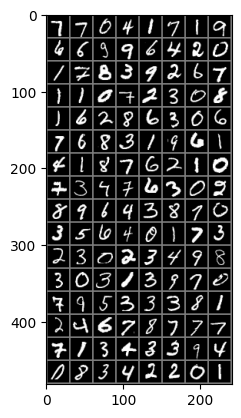

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to denormalize and visualize the images
def imshow(img):
    img = img / 2 + 0.5  # Denormalize to [0, 1] for visualization
    npimg = img.numpy()  # pytotch sensort to numpy  array
    # Rearranges the dimensions of the image. In PyTorch, images are stored as (channels, height, width), but matplotlib expects the format (height, widt
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.show()

# Get a batch of training data
dataiter = iter(dataloader)
images, labels = next(dataiter)  # Use next() instead of dataiter.next()

# Show images
imshow(torchvision.utils.make_grid(images))


#2: Define the DCGAN Architecture

In [ ]:
# Step 2: Define the DCGAN Architecture
import torch.nn as nn

# Generator Architecture
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(100, 512, 4, 1, 0, bias=False),  # v2- Increase from 256 to 512
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 1, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.model(input)


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 64, 4, 2, 1, bias=False),  # 28x28 -> 14x14
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),  # v2 Dropout after the first activation

            nn.Conv2d(64, 128, 4, 2, 1, bias=False),  # 14x14 -> 7x7
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),  # v2 Dropout after the first activation

            nn.Conv2d(128, 256, 3, 2, 1, bias=False),  # Reduced kernel size: 7x7 -> 4x4
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),  # v2 Dropout after the first activation

            nn.Conv2d(256, 1, 4, 1, 0, bias=False),  # 4x4 -> 1x1 output
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.model(input)

In [ ]:
# Step 3: Loss Functions and Optimizers

import torch

# Check if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Initialize the models
netG = Generator().to(device)
netD = Discriminator().to(device)

# Binary Cross-Entropy loss
criterion = nn.BCELoss()

# Adam optimizers
# lr = 0.0001
beta1 = 0.5
optimizerD = torch.optim.Adam(netD.parameters(), lr=1e-5, betas=(beta1, 0.999))
optimizerG = torch.optim.Adam(netG.parameters(), lr=2e-5, betas=(beta1, 0.999)) #v2 - lr decreased


cuda


In [ ]:
#Step 4: Training the DCGAN
import torch
import torch.autograd as autograd

num_epochs = 200 #v2
real_label = 1.
label_smoothen = 0.8 # v2
fake_label = 0.

G_losses = []
D_losses = []

# Training Loop
for epoch in range(num_epochs):
    for i, data in enumerate(dataloader, 0):
        # Step 1: Train Discriminator
        netD.zero_grad()

        # Real images
        real_images = data[0].to(device)
        b_size = real_images.size(0)
        labels = torch.full((b_size,), label_smoothen, dtype=torch.float, device=device)

        # Forward pass real batch through D
        output = netD(real_images).view(-1)
        errD_real = criterion(output, labels)
        errD_real.backward()

        # Fake images
        noise = torch.randn(b_size, 100, 1, 1, device=device)
        fake_images = netG(noise)
        labels.fill_(fake_label)

        # Forward pass fake batch through D
        output = netD(fake_images.detach()).view(-1)
        errD_fake = criterion(output, labels)
        errD_fake.backward()
        optimizerD.step()

        # Step 2: Train Generator
        for _ in range(2): #Since the generator is struggling, train it more ofte
          netG.zero_grad()
          labels.fill_(real_label)
          output = netD(fake_images).view(-1)
          errG = criterion(output, labels)
          errG.backward()
          optimizerG.step()

        # Track the losses
        G_losses.append(errG.item())
        D_losses.append(errD_real.item() + errD_fake.item())

    # print(f'Epoch {epoch+1}/{num_epochs} \tLoss_D: {errD_real + errD_fake:.4f} \tLoss_G: {errG:.4f}')
    # Print the losses along with epoch and iteration (batch number)
    print(f"Epoch {epoch+1}/{num_epochs}, Batch {i+1}/{len(dataloader)}, Loss_D: {errD_real.item() + errD_fake.item()}, Loss_G: {errG.item()}")

Epoch 1/10 	Loss_D: 0.0005 	Loss_G: 8.0161
Epoch 2/10 	Loss_D: 0.0001 	Loss_G: 9.4238
Epoch 3/10 	Loss_D: 0.0000 	Loss_G: 10.3678
Epoch 4/10 	Loss_D: 0.0000 	Loss_G: 10.9069
Epoch 5/10 	Loss_D: 0.0000 	Loss_G: 11.2522
Epoch 6/10 	Loss_D: 0.0000 	Loss_G: 11.8063
Epoch 7/10 	Loss_D: 0.0000 	Loss_G: 11.9493
Epoch 8/10 	Loss_D: 0.0000 	Loss_G: 12.1562
Epoch 9/10 	Loss_D: 0.0000 	Loss_G: 11.4846
Epoch 10/10 	Loss_D: 0.0000 	Loss_G: 12.0419


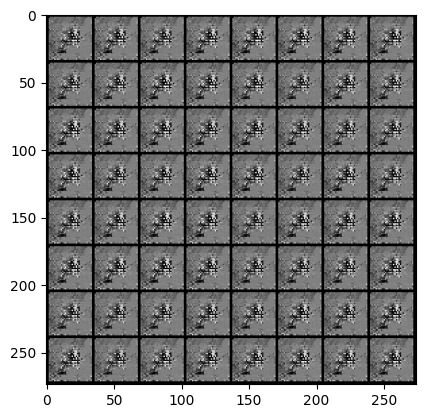

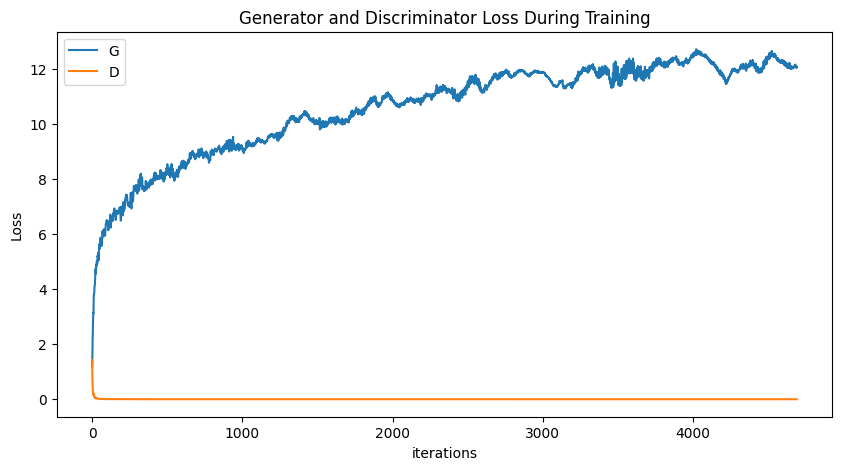

In [ ]:
#Step 5: Evaluate and Visualize Results
import matplotlib.pyplot as plt

# Generate some images from the generator
noise = torch.randn(64, 100, 1, 1, device=device)
fake_images = netG(noise).detach().cpu()

# Visualize the generated images
grid_img = torchvision.utils.make_grid(fake_images, padding=2, normalize=True)
plt.imshow(grid_img.permute(1, 2, 0))
plt.show()

# Plot Loss Curves
plt.figure(figsize=(10, 5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses, label="G")
plt.plot(D_losses, label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()


Findings major imbalance between the Generator (G) and Discriminator (D) during training. The Discriminator loss is near zero, which indicates that the Discriminator is dominating the Generator, and it has become too good at distinguishing between real and fake images

Summary of Adjustments:(v2)
*  Lower the learning rate for the discriminator so it doesn’t overpower the generator.
*  Train the generator more frequently to give it more chances to improve.
*  Use label smoothing to make the discriminator less confident.
*  Add dropout in the discriminator to weaken its certainty.
*  Increase the generator’s capacity by adding more layers or filters.